#**Stroke Prediction**


> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

> This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

##**Exploratory Data Analysis**


1. Missing values
2. Outliers
3. Categorical Variables
4. Balancing Dataset





###*Read and count data*<br/>
*https://www.kaggle.com/fedesoriano/stroke-prediction-dataset*




In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

###*Get column information*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###*Describe Data*

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


###**HeatMap to check the Missing values/Null values of all columns**




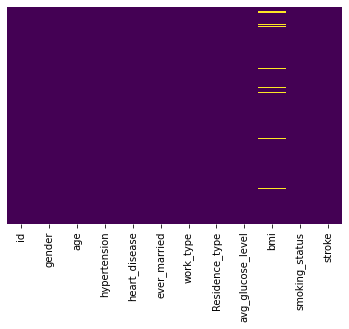

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###**Identifying and Handling Outliers**

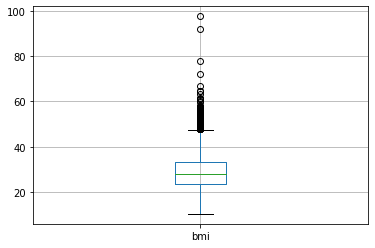

In [6]:
df.boxplot(column='bmi')

In [7]:
min_threshold, max_threshold = df.bmi.quantile([0.001, 0.999])
min_threshold, max_threshold

(12.754000000000001, 64.9840000000011)

In [8]:
new_df = df[(df.bmi<max_threshold) & (df.bmi>min_threshold)]
new_df.shape

(4899, 12)

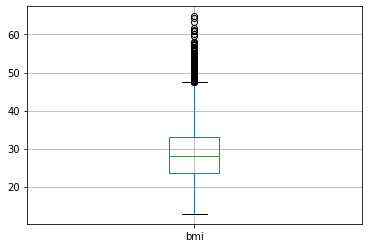

In [9]:
new_df.boxplot(column='bmi')

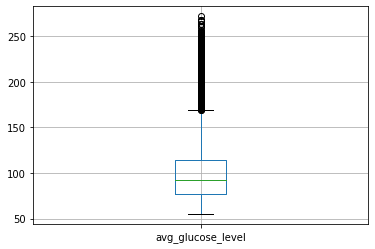

In [10]:
df.boxplot(column='avg_glucose_level')

In [11]:
min_threshold_glucose, max_threshold_glucose = new_df.avg_glucose_level.quantile([0.001, 0.99])
min_threshold_glucose, max_threshold_glucose

(55.26898, 240.59239999999994)

In [12]:
new_df = new_df[(new_df.avg_glucose_level<max_threshold_glucose) & (new_df.avg_glucose_level>min_threshold_glucose)]
new_df.shape

(4845, 12)

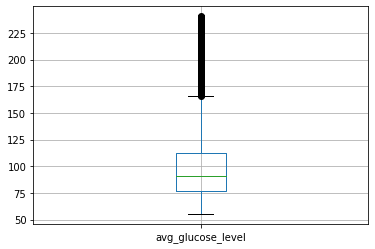

In [13]:
new_df.boxplot(column='avg_glucose_level')

###*Describe data after handling outliers*

In [14]:
new_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000
mean,37004.718885,42.672008,0.089783,0.048504,103.904778,28.830237,0.041280
std,20992.945627,22.516498,0.285901,0.214850,42.134289,7.657774,0.198957
min,77.000000,0.080000,0.000000,0.000000,55.270000,12.800000,0.000000
25%,18412.000000,25.000000,0.000000,0.000000,76.980000,23.500000,0.000000
50%,37483.000000,44.000000,0.000000,0.000000,91.350000,28.000000,0.000000
75%,55051.000000,60.000000,0.000000,0.000000,112.640000,33.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,240.590000,64.800000,1.000000


**Heat map after handling outliers**


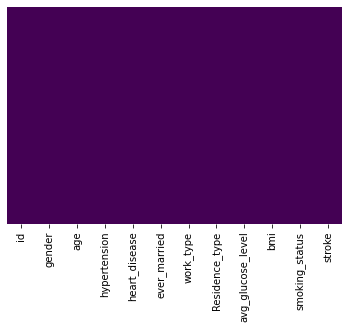

In [15]:
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Handling Categorical Variable using One Hot Encoding**<br/>
We have below Categorical variables in our dataset:<br/>
gender, ever_married, work_type, Residence_type, smoking_status



In [16]:
ndf_gender=pd.get_dummies(new_df['gender'])
ndf_gender=ndf_gender.drop(['Other'],axis=1)
ndf_ever_Married=pd.get_dummies(new_df['ever_married'])
ndf_work_type=pd.get_dummies(new_df['work_type'])
ndf_Residence_type=pd.get_dummies(new_df['Residence_type'])
ndf_smoking_status=pd.get_dummies(new_df['smoking_status'])
new_df=pd.concat([new_df,ndf_gender,ndf_ever_Married,ndf_work_type,ndf_Residence_type,ndf_smoking_status],axis=1)
new_df=new_df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
new_df.rename(columns={"Yes":"Married","No":"UnMarried"},inplace=True)
new_df.head(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,UnMarried,Married,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


###**Segregating Predictors and Target**

In [17]:
Preds=new_df.drop(["id", "stroke"],axis=1)
Target=new_df["stroke"]

###**Check for Data Distribution and handle the imbalances(if any)**

In [18]:
def get_labels(a,b):
  if a==0:
    label1="Stroke"
  else:
    label1="Not a Stroke"
  if b==0:
    label2="Stroke"
  else:
    label2="Not a Stroke"
  return label1,label2    

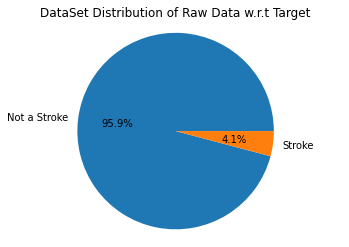

In [19]:
labels=list(Counter(Target).keys())
Data = [Counter(Target)[0],Counter(Target)[1]]
label1,label2=get_labels(labels[0],labels[1])
my_labels = label1,label2
plt.pie(Data,labels=my_labels,autopct='%1.1f%%')
plt.title('DataSet Distribution of Raw Data w.r.t Target')
plt.axis('equal')
plt.show()

**The above chart indicates that data is Imbalanced**

---



###**Handle Imbalance using RamdomOversampling Technique**


In [20]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_Train,y_Test=train_test_split(Preds,Target,train_size=0.7)


In [21]:
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(.75)
X_Train_os,y_Train_os=os.fit_resample(X_Train,y_Train)
Counter(y_Train_os)


Counter({0: 3245, 1: 2433})

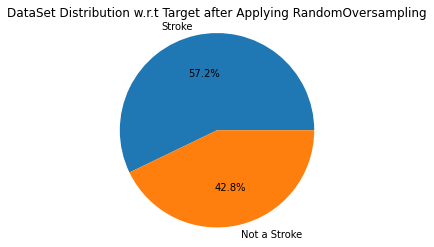

In [22]:
labels=list(Counter(y_Train_os).keys())
Data = [Counter(y_Train_os)[0],Counter(y_Train_os)[1]]
label1,label2=get_labels(labels[0],labels[1])
my_labels = label1,label2
plt.pie(Data,labels=my_labels,autopct='%1.1f%%')
plt.title('DataSet Distribution w.r.t Target after Applying RandomOversampling')
plt.axis('equal')
plt.show()

**After applying RandomOverSampling on training dataset,now the data distrbution looks balanced**

# **Model Training and Evaluation**


1. Decision Tree Classification.
2. Support Vector Classification.
3. KNN with RandomSearchCV
4. XGBoost








##**Decision Tree Classification**


> <i>Inputs: X_Train_os, y_Train_os</i><br/>
> <i>Output: y_pred</i><br/>
> <i>Tools: DecisionTreeClassifier from sklearn.tree</i>

In [23]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier()
model_dt.fit(X_Train_os,y_Train_os)

DecisionTreeClassifier()

In [24]:
y_pred_dt=model_dt.predict(X_Test)
print("Metricies of Deccision Tress Classifier Model")
print("Confustion Matrix is as follows  \n{}".format(confusion_matrix(y_Test,y_pred_dt)))
print("Accuracy : {} ".format(accuracy_score(y_Test,y_pred_dt)))
print("Classification Reports are as follows  \n{}".format(classification_report(y_Test,y_pred_dt)))

Metricies of Deccision Tress Classifier Model
Confustion Matrix is as follows  
[[1347   53]
 [  52    2]]
Accuracy : 0.9277854195323246 
Classification Reports are as follows  
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1400
           1       0.04      0.04      0.04        54

    accuracy                           0.93      1454
   macro avg       0.50      0.50      0.50      1454
weighted avg       0.93      0.93      0.93      1454



##**Support Vector Classification Model**

> <i>Inputs: X_Train_os, y_Train_os</i><br/>
> <i>Output: y_pred</i><br/>
> <i>Tools: SVC from sklearn.svm</i>

In [25]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_Train_os,y_Train_os)

SVC()

In [26]:
y_pred_svm=model_svc.predict(X_Test)
print("Metricies of Support Vector Classification Model")
print("Confustion Matrix is as follows  \n{}".format(confusion_matrix(y_Test,y_pred_svm)))
print("Accuracy : {} ".format(accuracy_score(y_Test,y_pred_svm)))
print("Classification Reports are as follows  \n{}".format(classification_report(y_Test,y_pred_svm)))

Metricies of Support Vector Classification Model
Confustion Matrix is as follows  
[[1047  353]
 [  10   44]]
Accuracy : 0.750343878954608 
Classification Reports are as follows  
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1400
           1       0.11      0.81      0.20        54

    accuracy                           0.75      1454
   macro avg       0.55      0.78      0.52      1454
weighted avg       0.96      0.75      0.83      1454



##**KNN with RandomSearchCV**
> <i>Inputs: X_Train_os, y_Train_os, cv, random_state</i><br/>
> <i>Output: y_pred</i><br/>
> <i>Tools: KNeighborsClassifier from sklearn.neighbours; KFold, RandomizedSearchCV from sklearn.model_selection</i>



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV

model_knn=KNeighborsClassifier()
grid={'n_neighbors':[5]}
cv=KFold(n_splits=30,random_state=None,shuffle=False)

In [28]:
model_rscv = RandomizedSearchCV(model_knn, grid,cv=cv,random_state=0)
model_rscv.fit(X_Train_os,y_Train_os)

RandomizedSearchCV(cv=KFold(n_splits=30, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [5]}, random_state=0)

In [29]:
model_rscv.best_params_

{'n_neighbors': 5}

In [30]:
y_pred_rscv=model_rscv.predict(X_Test)
print("Metricies of RandomizedSearchCV Model")
print("Confustion Matrix is as follows  \n{}".format(confusion_matrix(y_Test,y_pred_rscv)))
print("Accuracy : {} ".format(accuracy_score(y_Test,y_pred_rscv)))
print("Classification Reports are as follows  \n{}".format(classification_report(y_Test,y_pred_rscv)))

Metricies of RandomizedSearchCV Model
Confustion Matrix is as follows  
[[1240  160]
 [  37   17]]
Accuracy : 0.8645116918844566 
Classification Reports are as follows  
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1400
           1       0.10      0.31      0.15        54

    accuracy                           0.86      1454
   macro avg       0.53      0.60      0.54      1454
weighted avg       0.94      0.86      0.90      1454



##**XGBoost**
> <i>Inputs: X_Train_os, y_Train_os</i><br/>
> <i>Output: y_pred</i><br/>
> <i>Tools: XGBClassifier from xgboost</i>

In [31]:
from xgboost import XGBClassifier
model_xg=XGBClassifier()
model_xg.fit(X_Train_os,y_Train_os)

XGBClassifier()

In [32]:
y_pred_xg=model_xg.predict(X_Test)
print("Metricies of XGBOOST Model")
print("Confustion Matrix is as follows  \n{}".format(confusion_matrix(y_Test,y_pred_xg)))
print("Accuracy : {} ".format(accuracy_score(y_Test,y_pred_xg)))
print("Classification Reports are as follows  \n{}".format(classification_report(y_Test,y_pred_xg)))

Metricies of XGBOOST Model
Confustion Matrix is as follows  
[[1141  259]
 [  17   37]]
Accuracy : 0.8101788170563962 
Classification Reports are as follows  
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1400
           1       0.12      0.69      0.21        54

    accuracy                           0.81      1454
   macro avg       0.56      0.75      0.55      1454
weighted avg       0.95      0.81      0.87      1454



##**Plotting ROC curve**




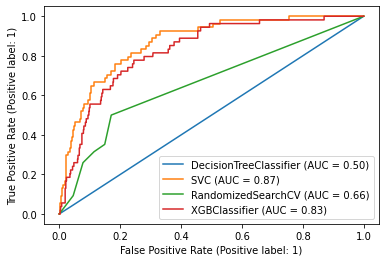

In [33]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(model_dt,X_Test,y_Test)
plot_roc_curve(model_svc,X_Test,y_Test,ax=disp.ax_)
plot_roc_curve(model_rscv,X_Test,y_Test,ax=disp.ax_)
plot_roc_curve(model_xg,X_Test,y_Test,ax=disp.ax_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
error=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(model_knn,X_Train_os,y_Train_os,cv=10)
  error.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

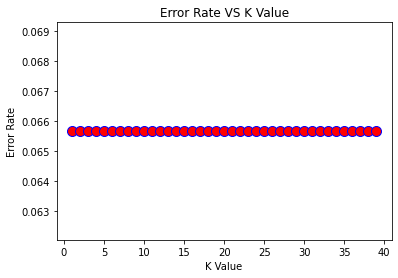

In [ ]:
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate VS K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')